## Tarea 2

## P4 - Perturbation equations

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from scipy.integrate import odeint
from matplotlib.cm import get_cmap
import scienceplots

plt.style.use(['science', 'bright'])
print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


In [27]:
Omega_r0= 1e-4
Omega_m0= 0.3
H0= 67
Omega_k = 0
w_DE= -1
Omega_lambda = 1 - Omega_r0 - Omega_m0 - Omega_k
# As delta_lambda is a constant, we can define it here
deltalambda = 0.1


In [29]:
def Hubble2(a_1, H0, Omega_r0 ,Omega_m0, Omega_lambda, Omega_k, w_DE):
    return H0**2 * (Omega_r0*(1/a_1)**4 + Omega_m0*(1/a_1)**3 +  Omega_lambda*(1/a_1)**(3*(1+w_DE)) + Omega_k*(1/a_1)**2)

# Defining the Hubble parameter as function of the time
def Hubble(a, H0, Omega_r0, Omega_m0, Omega_lambda, Omega_k, w_DE):
    return np.sqrt(Hubble2(a-1, H0, Omega_r0, Omega_m0, Omega_lambda, Omega_k, w_DE))

In [30]:
def deriv(y, a, k, H0, Omega_r0, Omega_m0, Omega_lambda, Omega_k, w_DE, deltalambda):
    thetam, deltam = y
    H = Hubble(a, H0, Omega_r0, Omega_m0, Omega_lambda, Omega_k, w_DE)
    dthetam_da = - thetam/a + -3*H/2*(3*a*H*thetam/(k**2) + deltam + deltalambda)
    ddeltam_da = (1/(1+ 9/(2*k**2)*a*H))*(-thetam/(a**2*H)+ 3/k**2*(-3*(a*H)*(H-H/a)*(3*a*H*thetam/(k**2) + deltam + deltalambda)- 3/2*a*H*(3*H*thetam/(k**2)-3*H/a*thetam/(k**2) + 3*a*(- thetam/a + -3*H/2*(3*a*H*thetam/(k**2) + deltam + deltalambda)))))
    return dthetam_da, ddeltam_da  

thetam, deltam = 0 , 1e-3
y0 = thetam, deltam
a = np.linspace(1e-4,1,100)
ks = [H0, 5* H0, 20*H0, 200*H0]

sol=odeint(deriv, y0 , a, args=(ks[0], H0, Omega_r0, Omega_m0, Omega_lambda, Omega_k, w_DE, deltalambda))
sol1=odeint(deriv, y0 , a, args=(ks[1], H0, Omega_r0, Omega_m0, Omega_lambda, Omega_k, w_DE, deltalambda))
sol2=odeint(deriv, y0 , a, args=(ks[2], H0, Omega_r0, Omega_m0, Omega_lambda, Omega_k, w_DE, deltalambda))
sol3=odeint(deriv, y0 , a, args=(ks[3], H0, Omega_r0, Omega_m0, Omega_lambda, Omega_k, w_DE, deltalambda))


<ipython-input-29-cff77ef00c27>:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Hubble2(a-1, H0, Omega_r0, Omega_m0, Omega_lambda, Omega_k, w_DE))
c:\Users\antoc\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


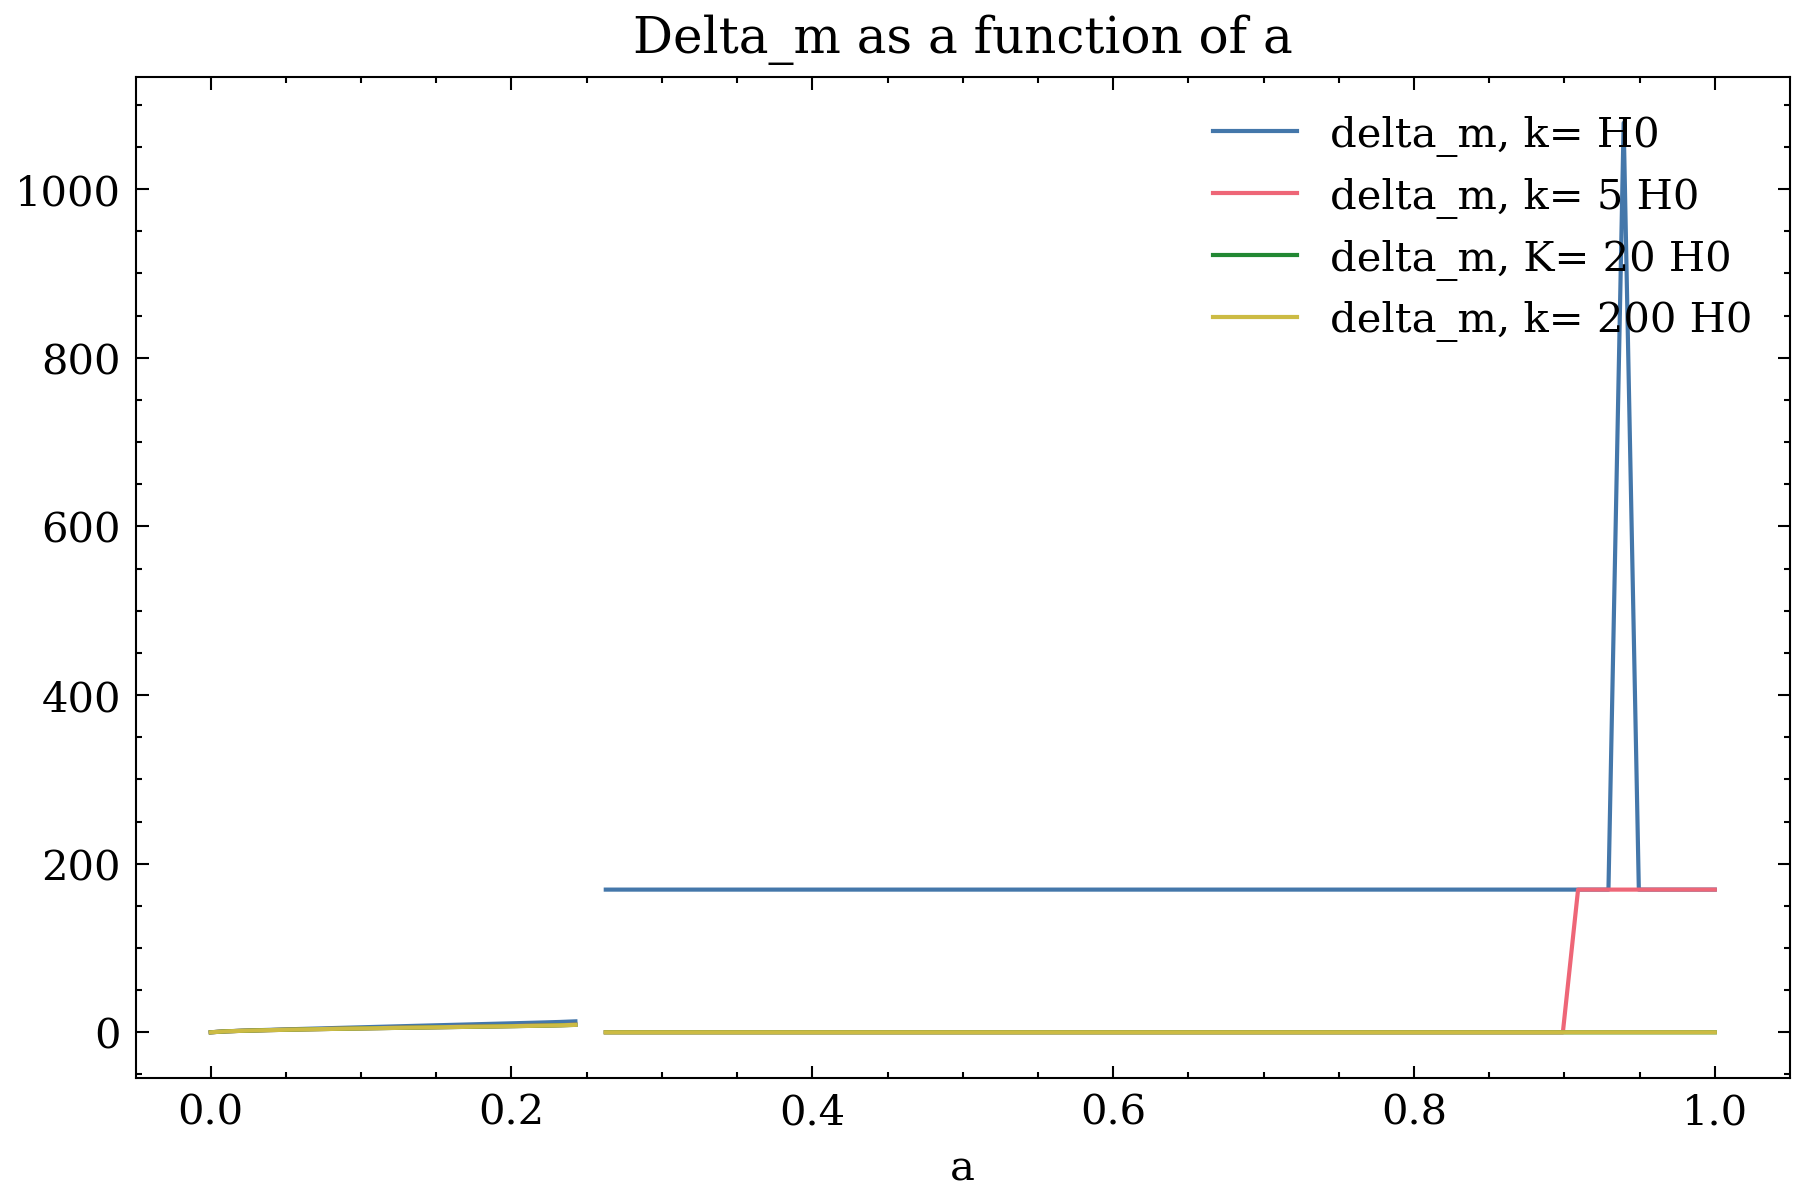

In [ ]:
plt.rcParams['text.usetex'] = False 

fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

ax.plot(a, sol[:,1], label =f'k= H0')
ax.plot(a, sol1[:,1], label =f'k= 5 H0')
ax.plot(a, sol2[:,1], label =f'k= 20 H0')
ax.plot(a, sol3[:,1], label =f'k= 200 H0')

ax.legend(loc='upper right')
ax.set_title('Delta_m as a function of a')
ax.set_xlabel(r'a')

plt.show()

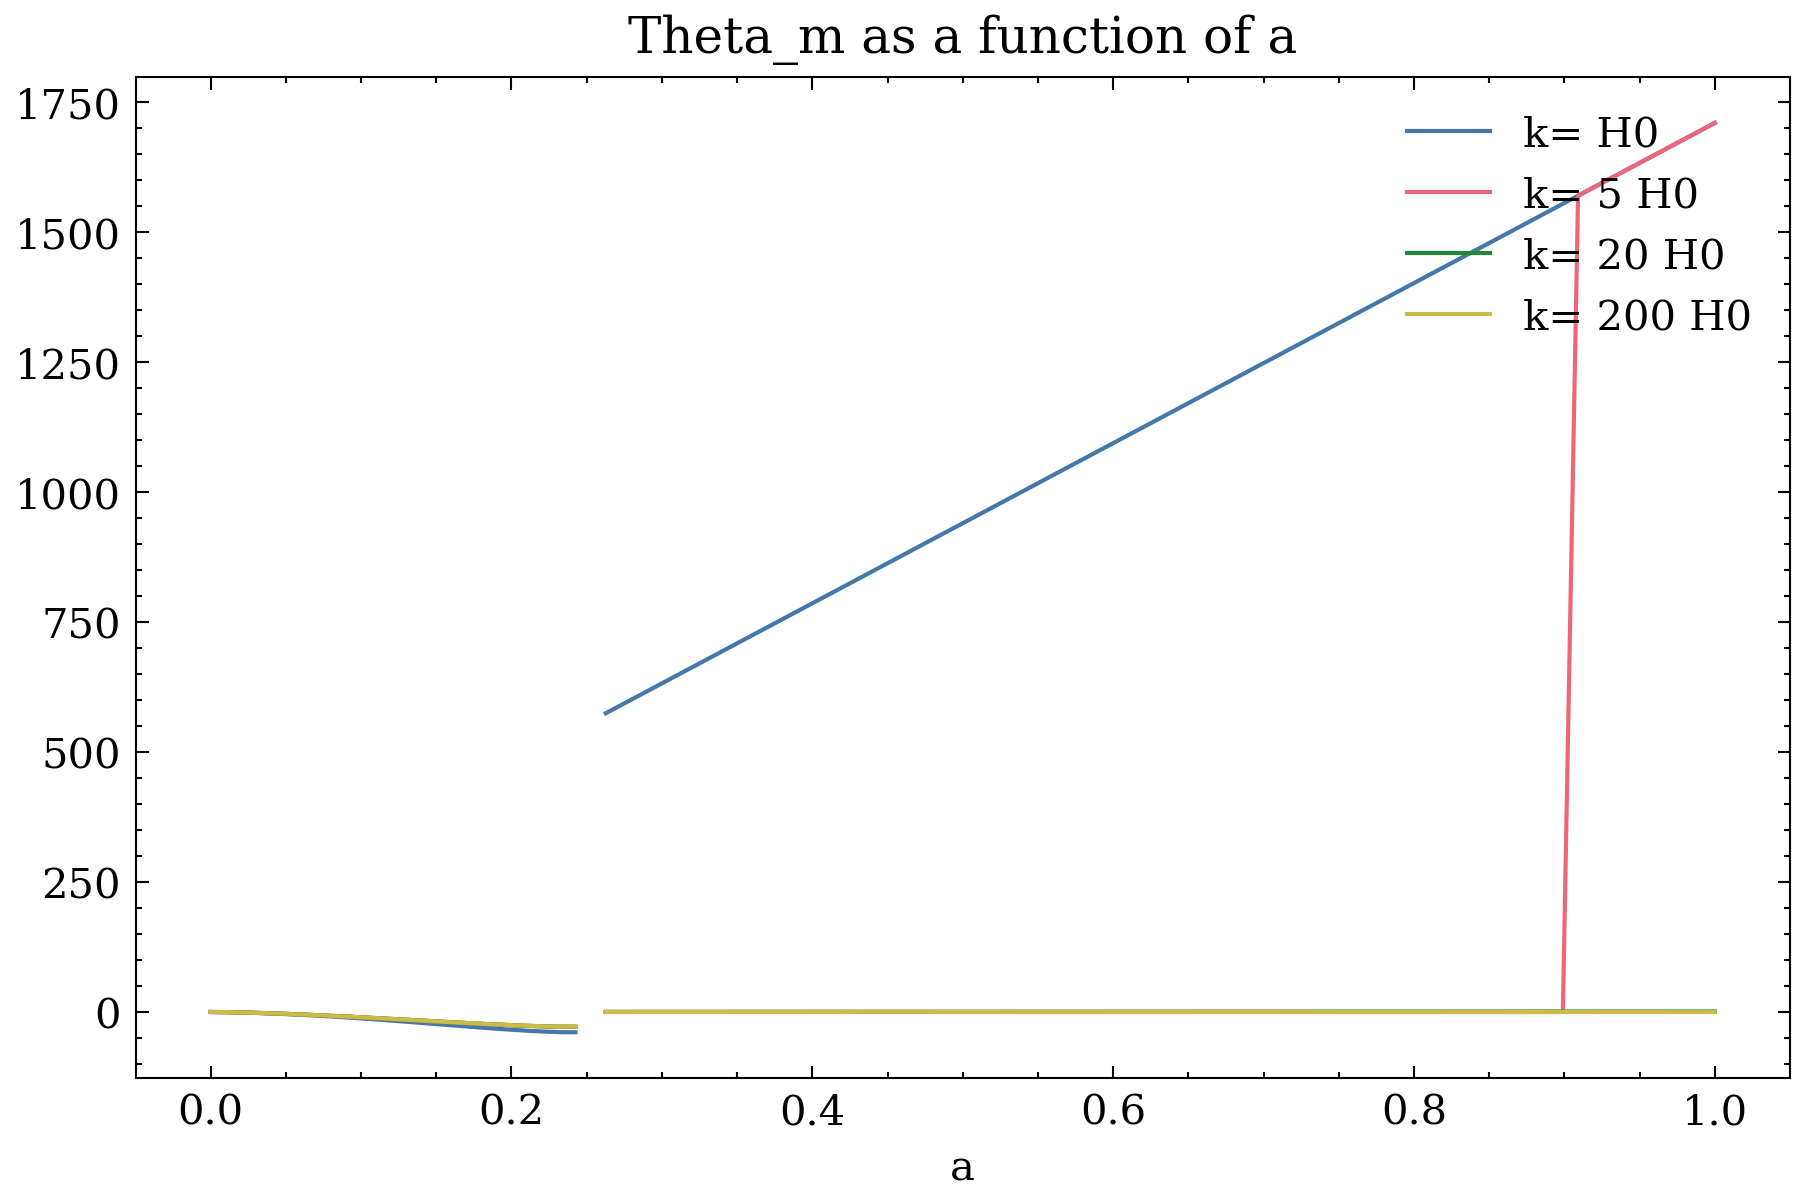

In [32]:
plt.rcParams['text.usetex'] = False 

fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

ax.plot(a, sol[:,0], label =f'k= H0')
ax.plot(a, sol1[:,0], label =f'k= 5 H0')
ax.plot(a, sol2[:,0], label =f'k= 20 H0')
ax.plot(a, sol3[:,0], label =f'k= 200 H0')

ax.legend(loc='upper right')
ax.set_title('Theta_m as a function of a')
ax.set_xlabel(r'a')

plt.show()

### P5 - Matter power spectra

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from scipy.integrate import quad
import scienceplots

plt.style.use(['science', 'bright'])
print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


In [34]:
pars = camb.set_params(H0=67.4, w=-1, cs2=0.1)

zmax= 250
zmin= 0
redshifts = np.arange(zmin, zmax, zmax//5)
#help(results.get_linear_matter_power_spectrum)

pars.set_matter_power(redshifts = redshifts, kmax = 1)
results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


In [35]:
kh, z, Pk = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True)

In [36]:
kh_nonlinear, z, Pk_nonlinear = results.get_linear_matter_power_spectrum(hubble_units=True, k_hunit= True, nonlinear=True)

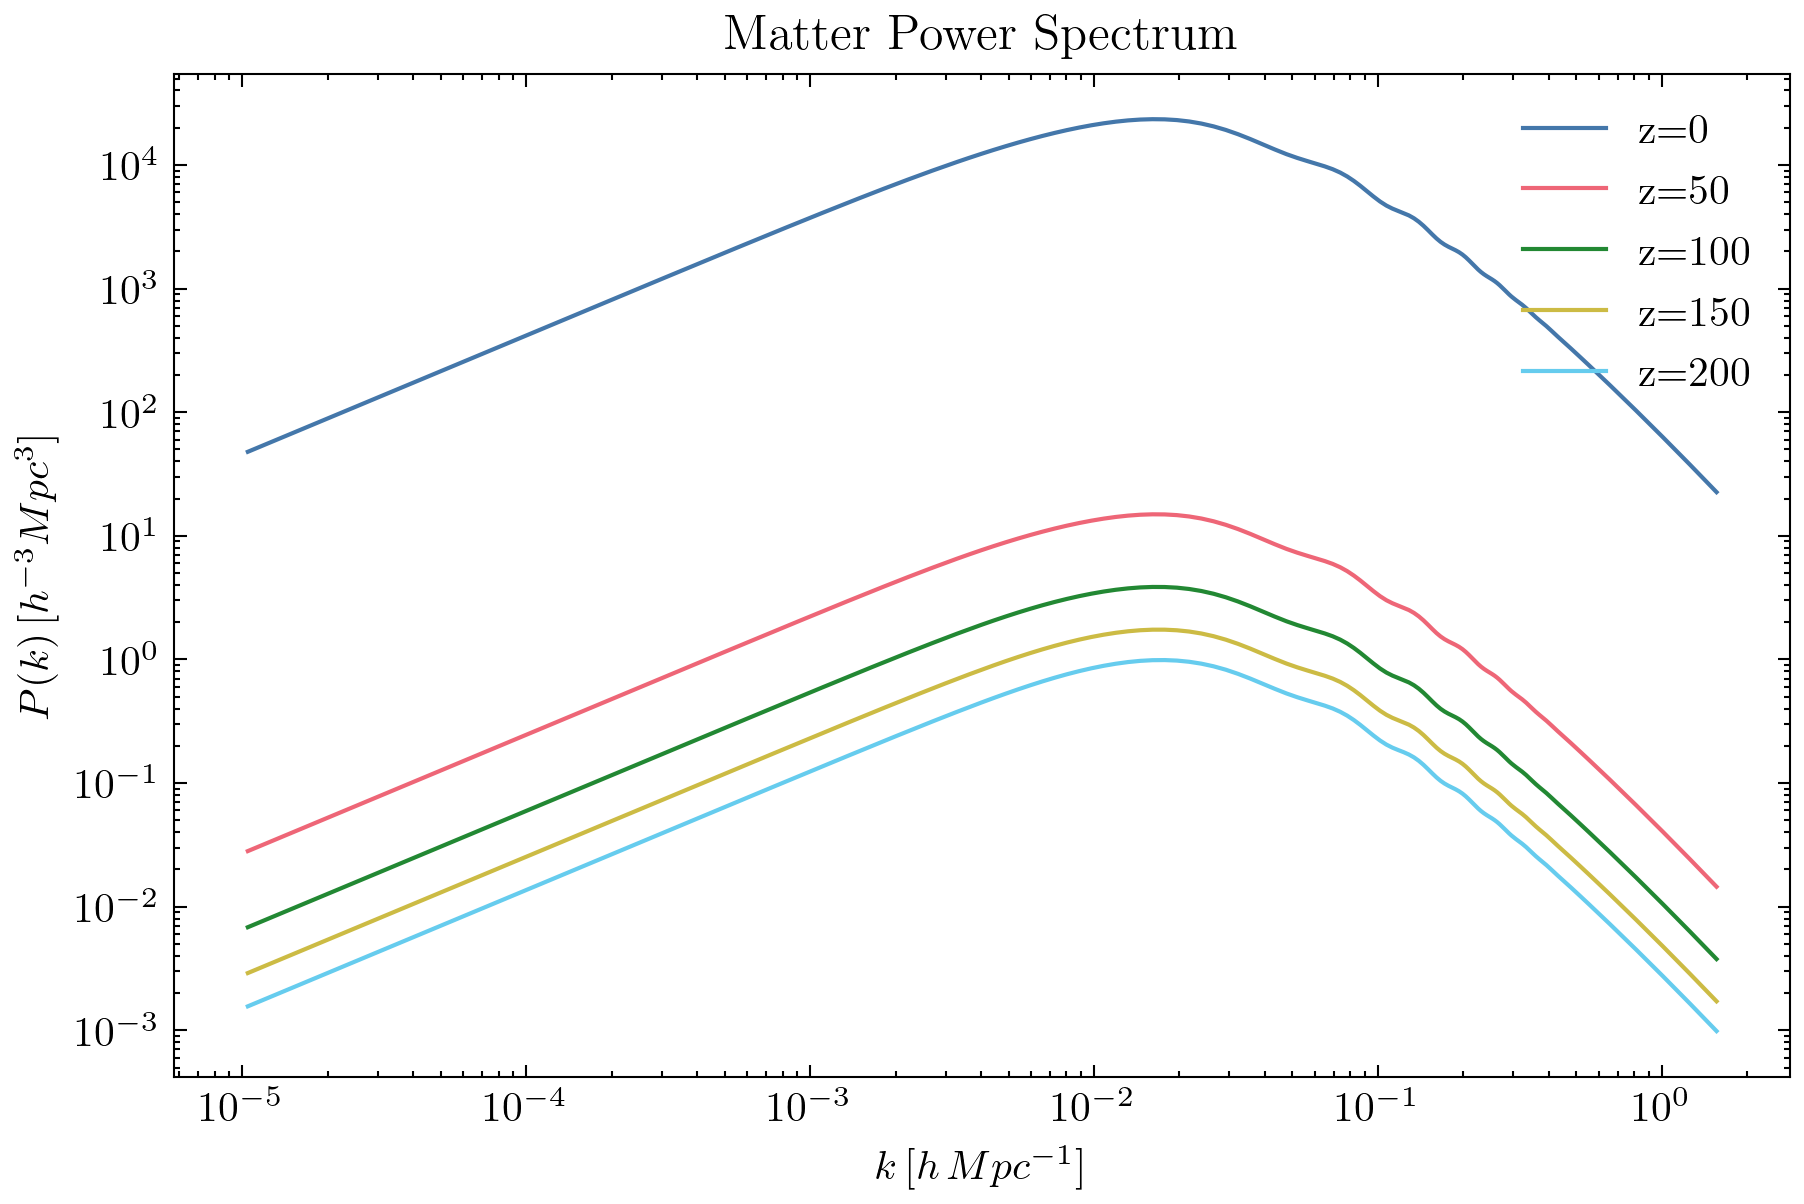

In [37]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

for z in range(len(redshifts)):
    ax.loglog(kh, Pk[z,:], label = f'z={redshifts[z]}')

ax.legend(loc='upper right')
ax.set_title('Matter Power Spectrum')
ax.set_xlabel(r'$k \, [h \, Mpc^{-1}]$')
ax.set_ylabel(r'$P(k) \, [h^{-3} Mpc^{3}]$')

plt.show()

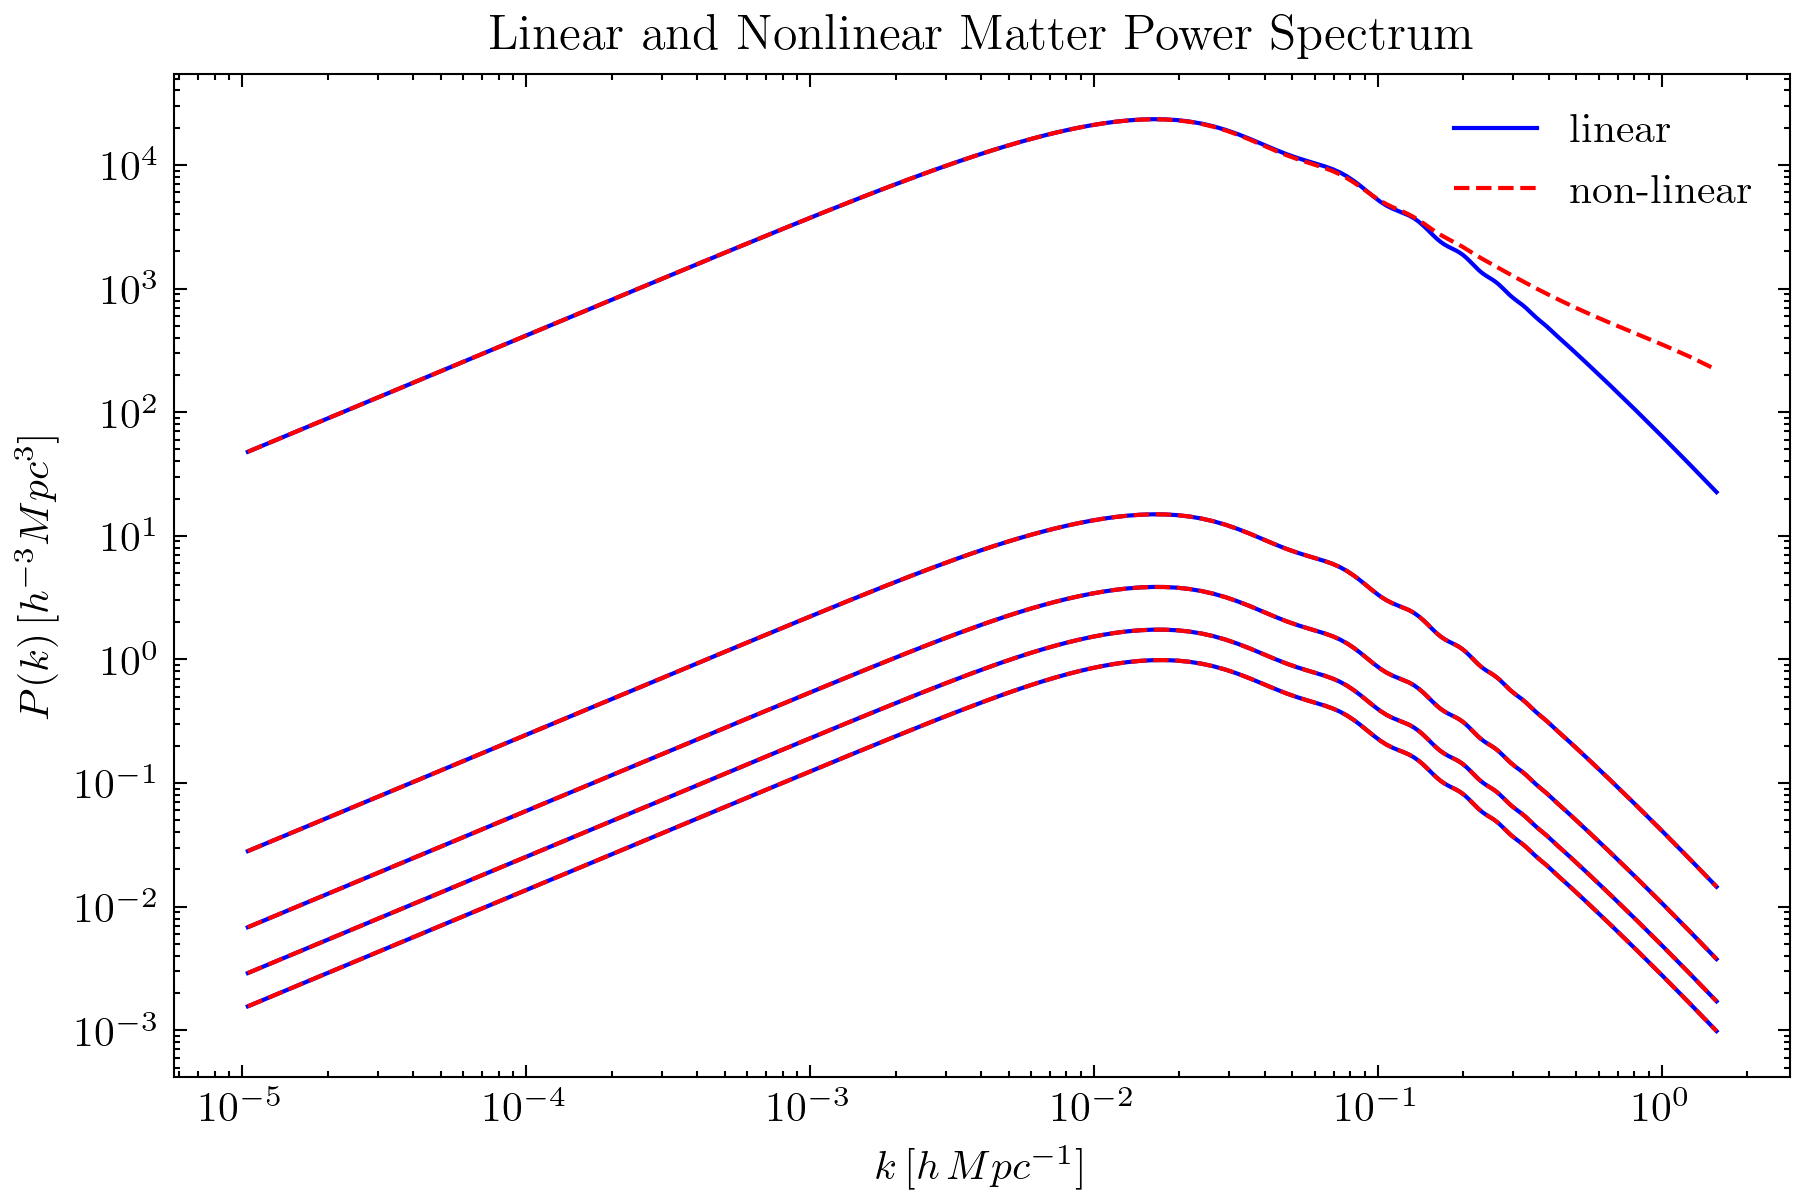

In [38]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

for z in range(len(redshifts)):
    ax.loglog(kh, Pk[z,:], color = 'b')
    ax.loglog(kh_nonlinear, Pk_nonlinear[z,:], '--', color = 'r' )

ax.legend(['linear', 'non-linear'], loc='upper right')
ax.set_title('Linear and Nonlinear Matter Power Spectrum')
ax.set_xlabel(r'$k \, [h \, Mpc^{-1}]$')
ax.set_ylabel(r'$P(k) \, [h^{-3} Mpc^{3}]$')

plt.show()

In [39]:
params = camb.CAMBparams()
params1 = camb.CAMBparams()

# Set the sum of neutrino masses to zero
params.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu = 0, num_massive_neutrinos= 0)
params1.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)


zmax= 10000
zmin= 0
redshifts = np.arange(zmin, zmax, zmax//5)
#help(results.get_linear_matter_power_spectrum)

params.set_matter_power(redshifts= redshifts, kmax = 1)
params1.set_matter_power(redshifts= redshifts, kmax = 1)

# Ensure WantTransfer is set to True
params.WantTransfer = True

results = camb.get_results(params)
results1 = camb.get_results(params1)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


In [40]:
kh, z, Pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=2, npoints = 200)
kh, z, Pk1 = results1.get_matter_power_spectrum(minkh=1e-4, maxkh=2, npoints = 200)

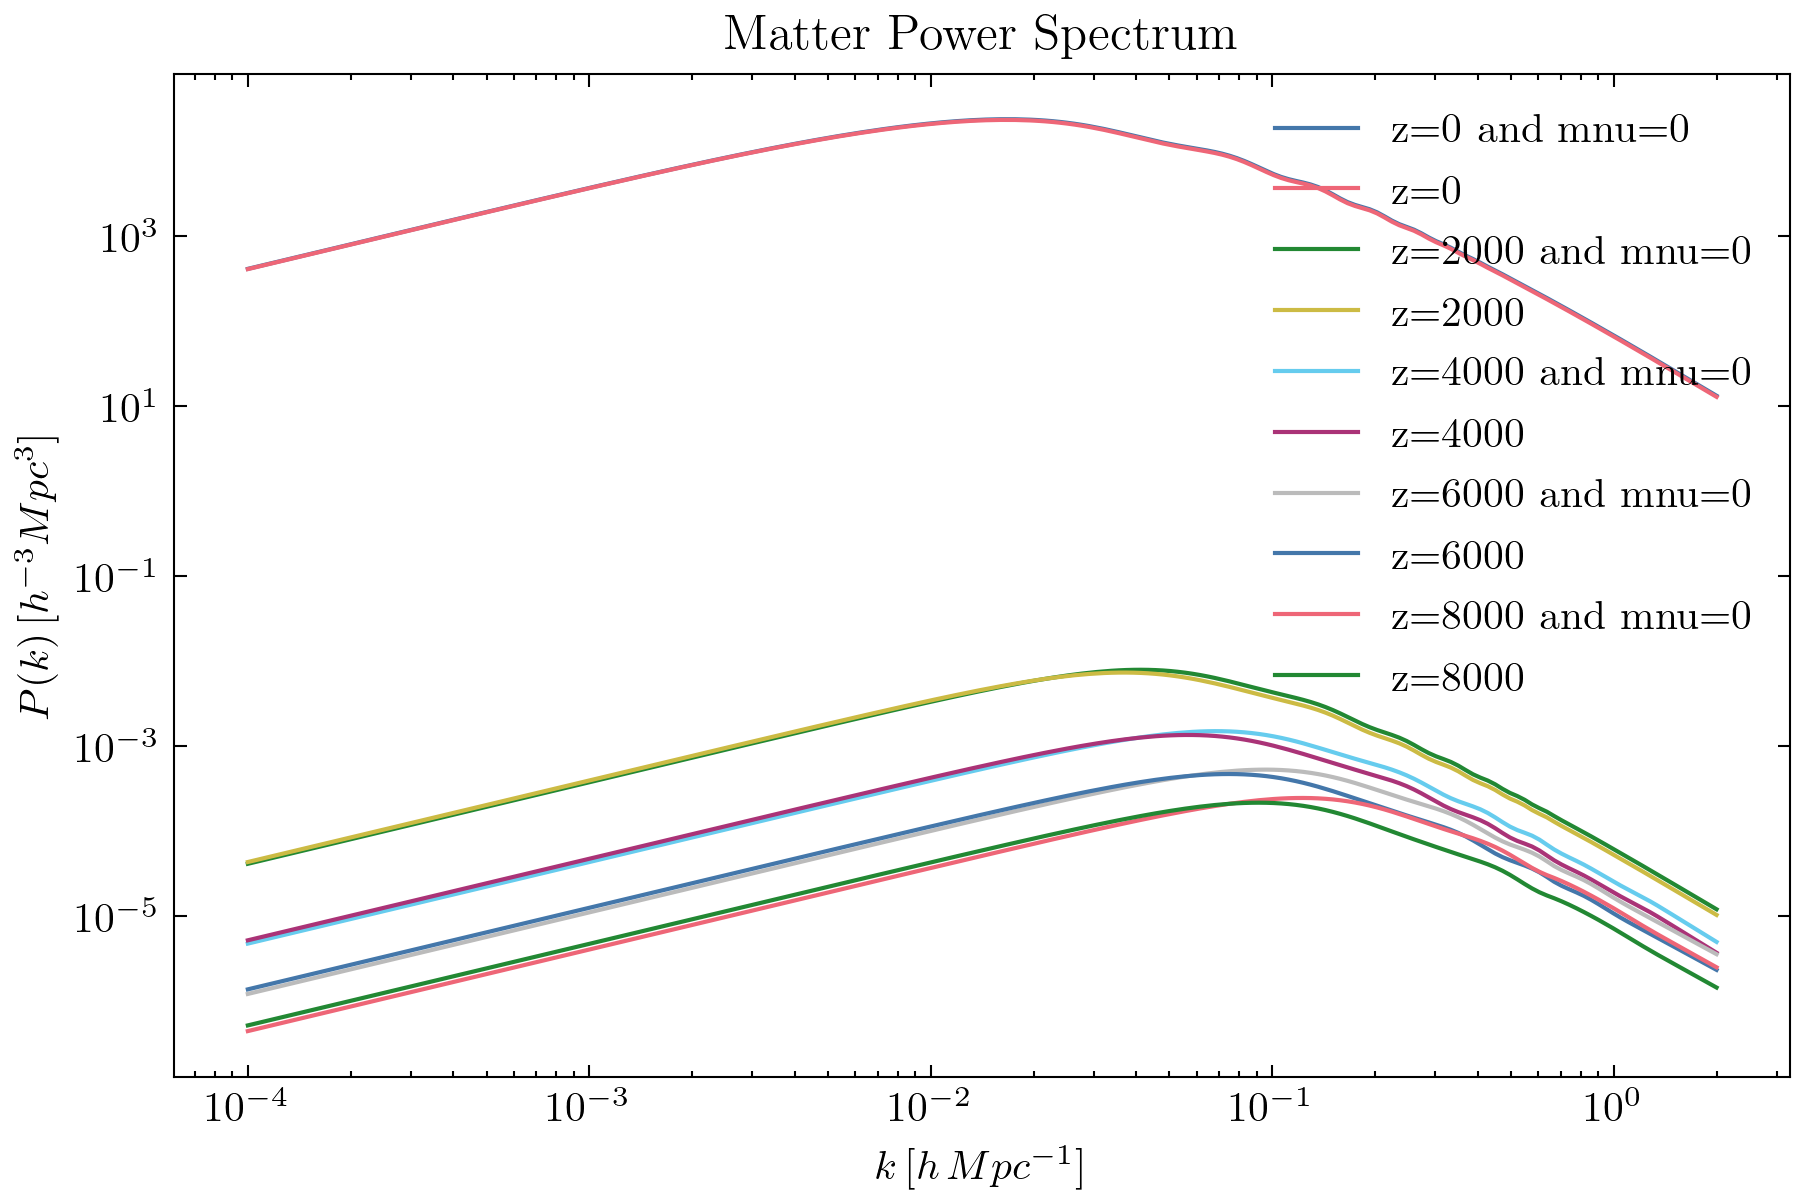

In [41]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

for z in range(len(redshifts)):
    ax.loglog(kh, Pk[z,:], label=f'z={redshifts[z]} and mnu=0')
    ax.loglog(kh, Pk1[z,:], label=f'z={redshifts[z]}')

ax.legend(loc='upper right')
ax.set_title('Matter Power Spectrum')
ax.set_xlabel(r'$k \, [h \, Mpc^{-1}]$')
ax.set_ylabel(r'$P(k) \, [h^{-3} Mpc^{3}]$')

plt.show()

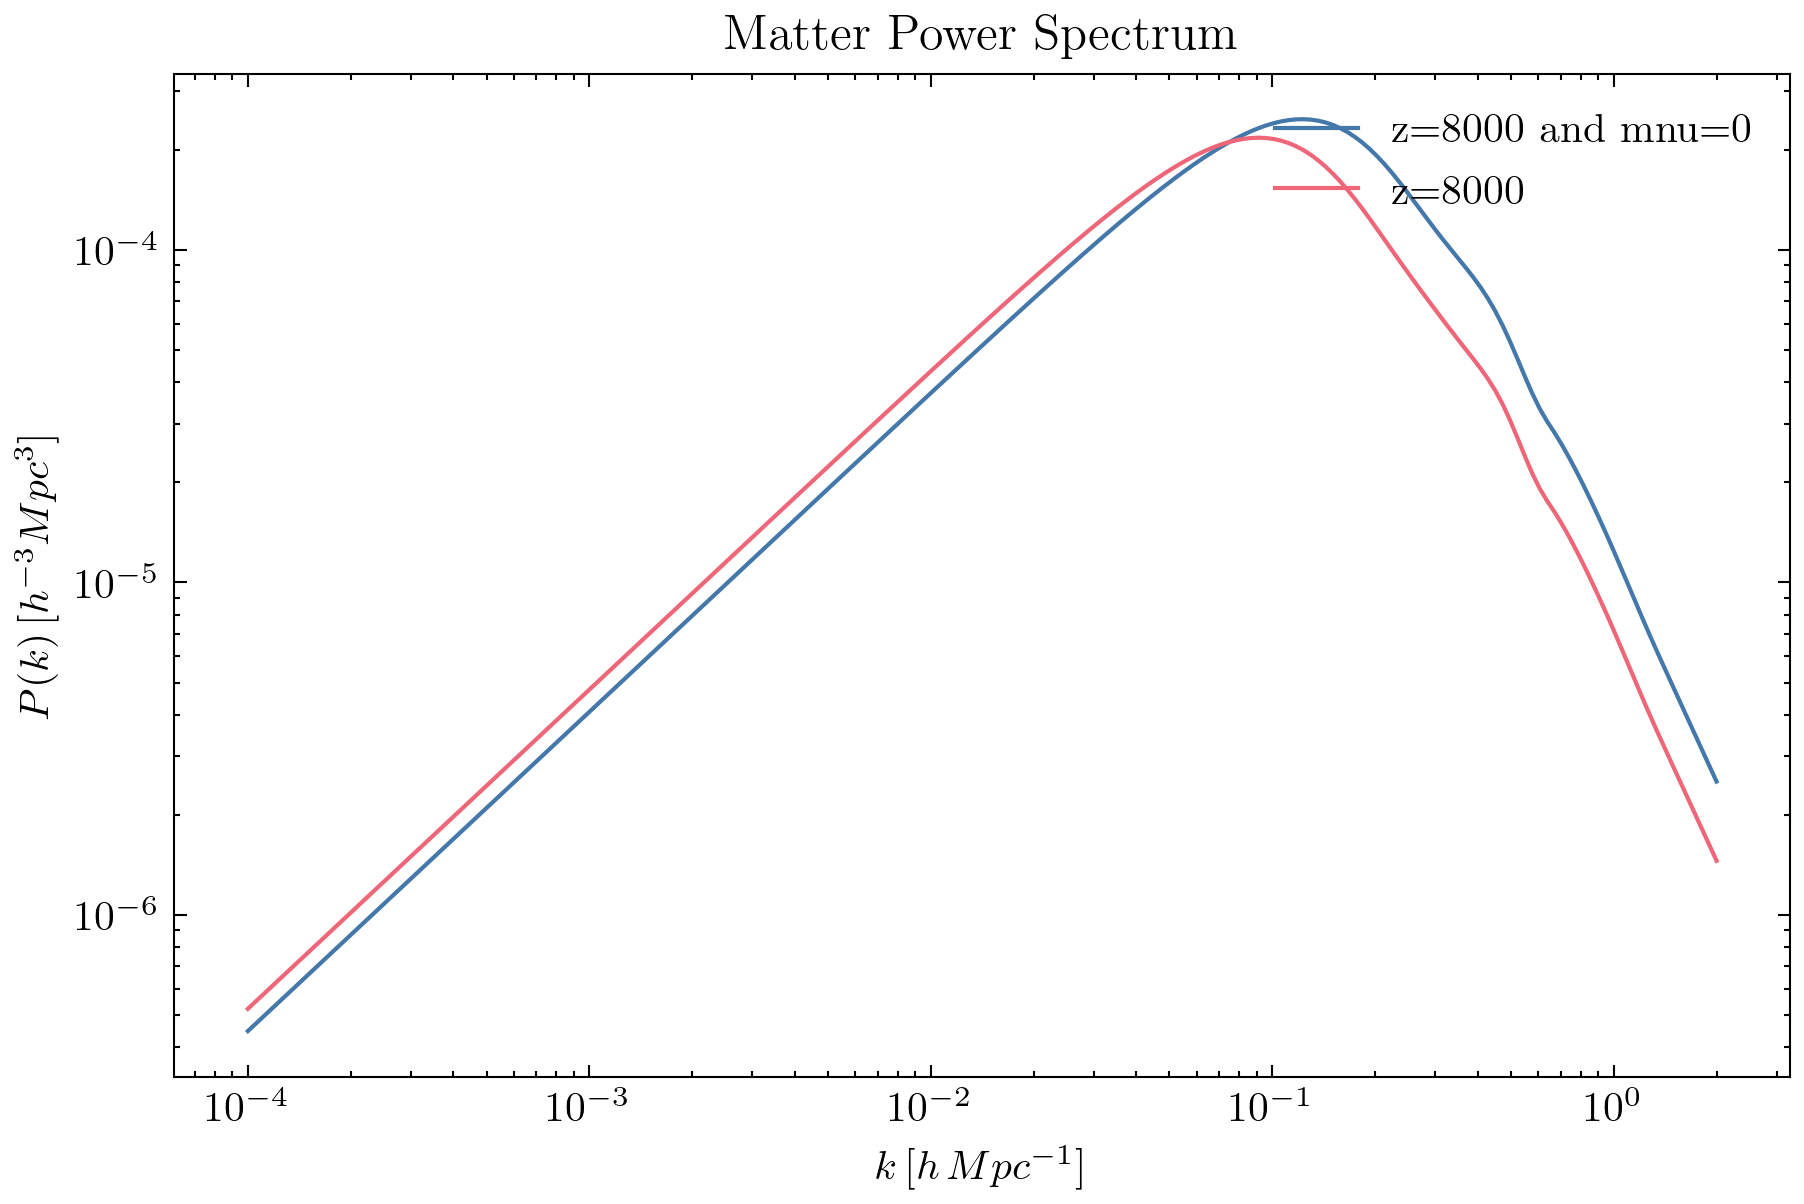

In [42]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

ax.loglog(kh, Pk[4,:], label=f'z={redshifts[z]} and mnu=0')
ax.loglog(kh, Pk1[4,:], label=f'z={redshifts[z]}')

ax.legend(loc='upper right')
ax.set_title('Matter Power Spectrum')
ax.set_xlabel(r'$k \, [h \, Mpc^{-1}]$')
ax.set_ylabel(r'$P(k) \, [h^{-3} Mpc^{3}]$')

plt.show()

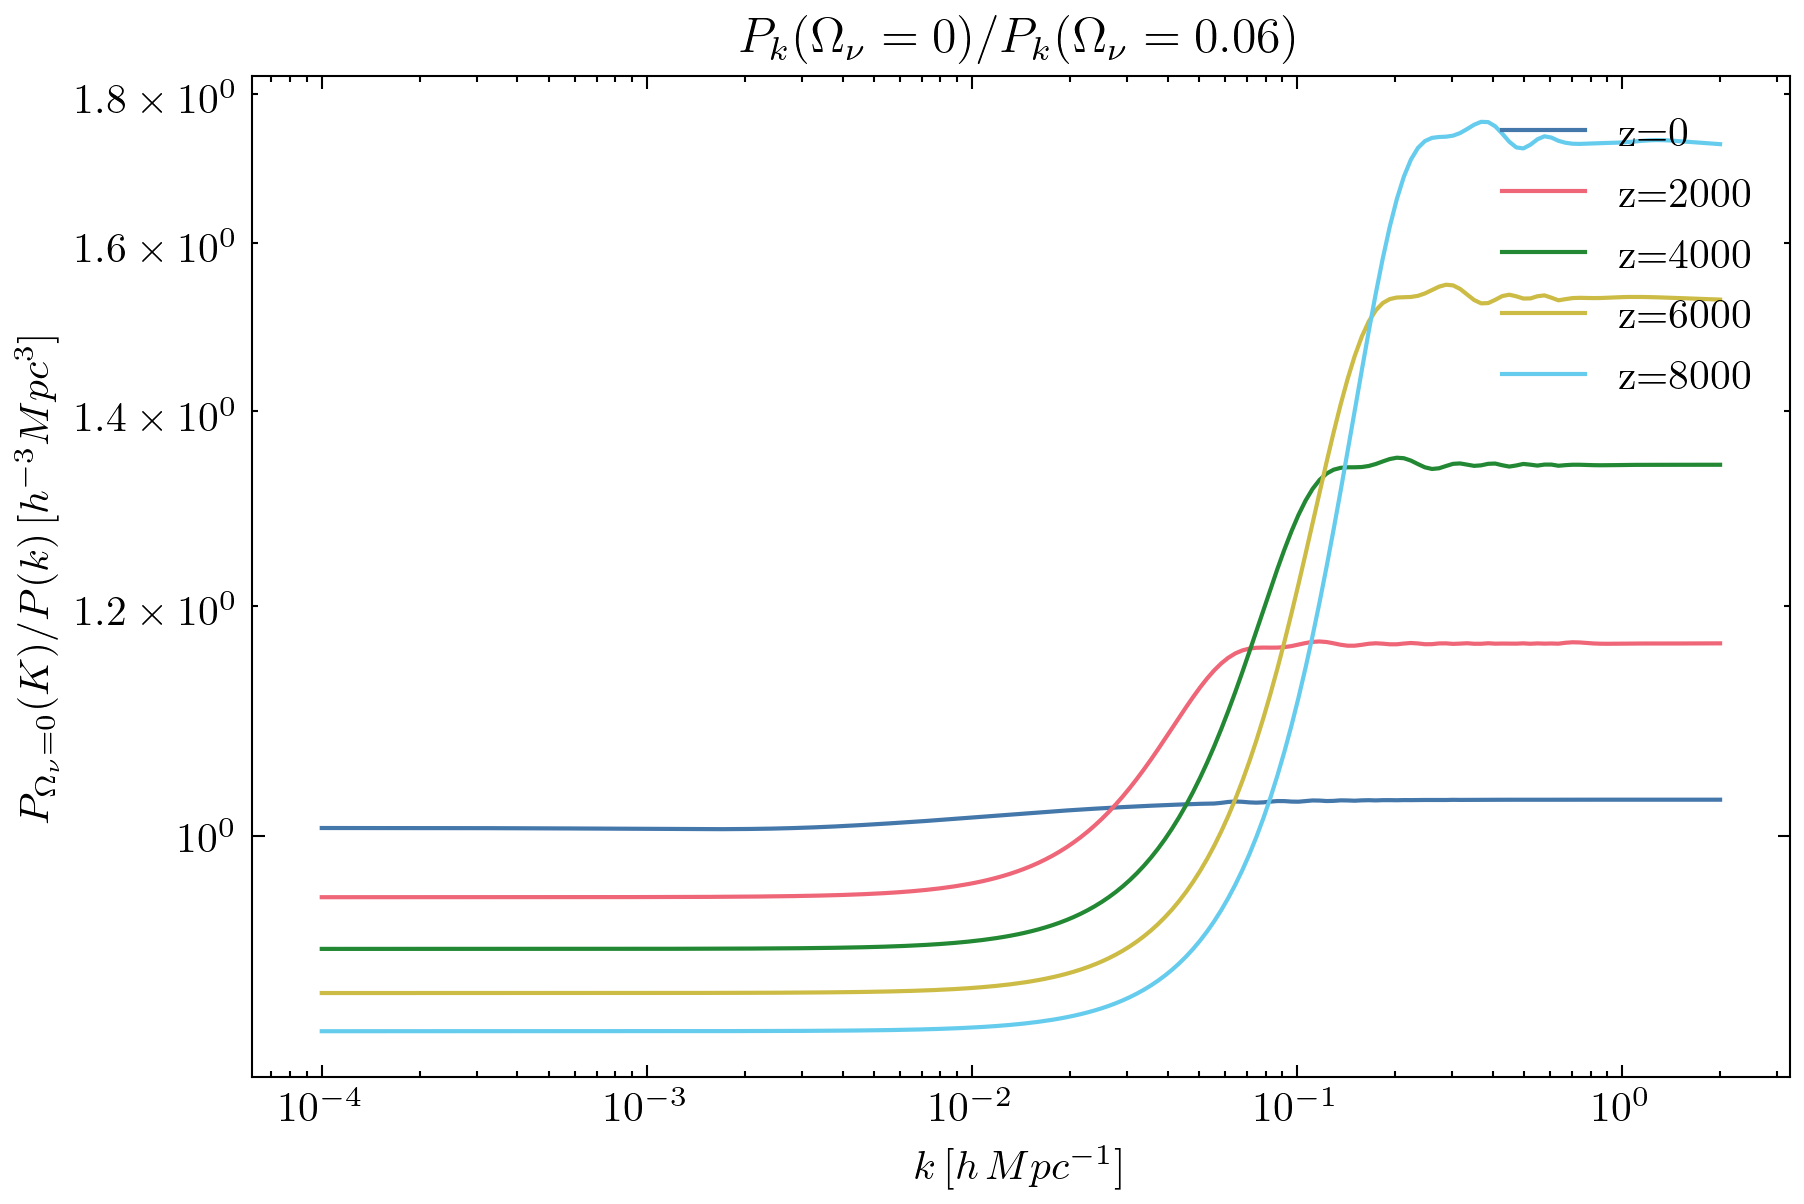

In [43]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

for z in range(len(redshifts)):
    ax.loglog(kh, Pk[z,:]/Pk1[z,:], label=f'z={redshifts[z]}')

ax.legend(loc='upper right')
ax.set_title(r'$P_k(\Omega_{\nu}=0)/ P_k(\Omega_{\nu} = 0.06)$')
ax.set_xlabel(r'$k \, [h \, Mpc^{-1}]$')
ax.set_ylabel(r'$P_{\Omega_{\nu} = 0}(K)/P(k) \, [h^{-3} Mpc^{3}]$')

plt.show()

Massive neutrinos behave like hot dark matter (CDM). This means they move at relativistic speeds and can escape from high-density regions. As neutrinos escape these regions, they smooth out the neutrino density field, which weakens gravitational potential wells, thereby suppressing structure formation growth, especially on small scales, which correspond to large 𝑘 values. 

Without the presence of massive neutrinos, gravitational potential wells are deeper, allowing for greater matter accumulation on these scales. Therefore, it makes sense that our result shows a power spectrum without massive neutrinos that is higher than the power spectrum including them for larger 𝑘.

## P6 - Angular power spectra

We define the parameters for each model

In [44]:
def param(Omega_m0h2, Omega_b0h2, h, Omega_k):
    #print('Omega_b * h^2 =', Omega_b0 * h**2)
    #print('Omega_c * h^2 =', (Omega_m0 - Omega_b0) * h**2)
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=100 * h, ombh2= Omega_b0h2, omch2=(Omega_m0h2 - Omega_b0h2), omk=Omega_k)
    pars.InitPower.set_params(As=2e-9, ns=0.965)
    pars.set_dark_energy(w=-1.0, cs2=1.0, wa=0, dark_energy_model='fluid')
    pars.set_for_lmax(2000, lens_potential_accuracy=1)
    return pars

h= 0.67
Omega_k = 0.0
Omega_mh2 = 0.127
Omega_bh2 = 0.020
results = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
powers = results.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

Omega_mh2 = 0.127
Omega_bh2 = 0.018
results1 = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
powers1 = results1.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

Omega_mh2 = 0.127
Omega_bh2 = 0.022
results2 = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
powers2 = results2.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

Omega_mh2 = 0.127
Omega_bh2 = 0.025
results3 = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
powers3 = results3.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

In [45]:
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


Text(0, 0.5, '$\\ell(\\ell+1)C_{\\ell}^{TT} / 2\\pi$ [$\\mu K^2$]')

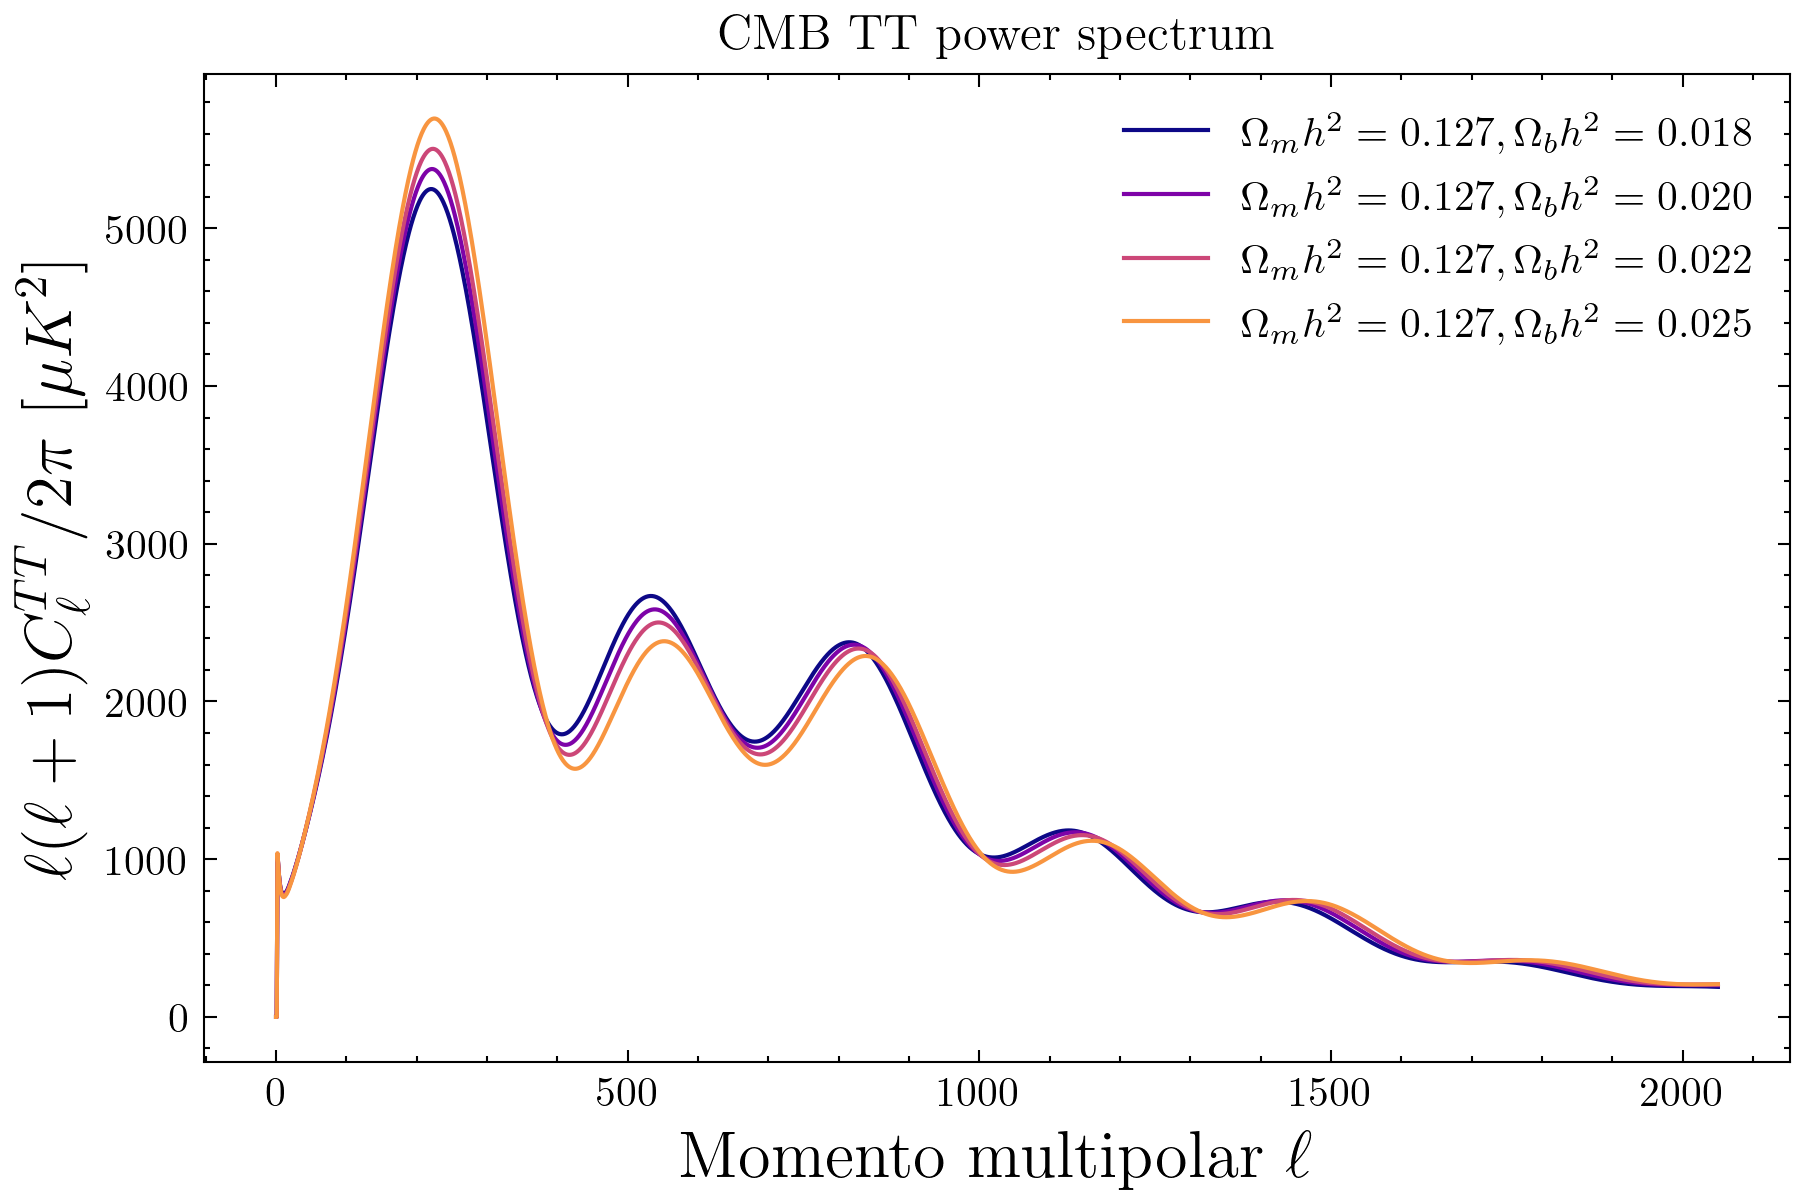

In [46]:
lensedCL = powers['lensed_scalar']
lensedCL1 = powers1['lensed_scalar']
lensedCL2 = powers2['lensed_scalar']
lensedCL3 = powers3['lensed_scalar']
ells = np.arange(lensedCL[:, 0].shape[0])

fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)

# Colors
cmap = get_cmap('plasma')
num_lines = 4
colors = [cmap(i / num_lines) for i in range(num_lines)]

ax.plot(ells, lensedCL1[:, 0], color=colors[0], label = r'$\Omega_{m}h^2 = 0.127, \Omega_{b}h^2 = 0.018$')
ax.plot(ells, lensedCL[:, 0], color=colors[1], label = r'$\Omega_{m}h^2 = 0.127, \Omega_{b}h^2 = 0.020$')
ax.plot(ells, lensedCL2[:, 0], color=colors[2], label = r'$\Omega_{m}h^2 = 0.127, \Omega_{b}h^2 = 0.022$')
ax.plot(ells, lensedCL3[:, 0], color=colors[3], label = r'$\Omega_{m}h^2 = 0.127, \Omega_{b}h^2 = 0.025$')

ax.legend(loc='upper right')
ax.set_title(r'CMB TT power spectrum')
ax.set_xlabel(r'Momento multipolar $\ell$', fontsize=16)
ax.set_ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)

The graph has this shape because the baryon density shifts the locations of the peaks due to changes in the sound horizon \($r_s$\), moving the peaks to smaller angular scales. Additionally, it alters the heights of the peaks, increasing the odd-to-even peak ratio as baryon density increases, since a higher baryon content enhances gravitational compression in the plasma. 

Finally, a higher baryon density shortens the diffusion length (increasing $k_D$), causing damping at smaller angular scales; thus, the anisotropy spectrum is larger for high $l$ values in models with higher $\Omega_b h^2$.

In [47]:
h= 0.67
Omega_k = 0.0
Omega_bh2 = 0.022
Omega_mh2 = 0.095 + Omega_bh2
results = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
print(Omega_mh2)
powers = results.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

Omega_bh2 = 0.022
Omega_mh2 = 0.107 + Omega_bh2
results1 = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
print(Omega_mh2)
powers1 = results1.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

Omega_bh2 = 0.022
Omega_mh2 = 0.119 + Omega_bh2
results2 = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
print(Omega_mh2)
powers2 = results2.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

Omega_bh2 = 0.022
Omega_mh2 = 0.131 + Omega_bh2
results3 = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
print(Omega_mh2)
powers3 = results3.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

0.11699999999999999
0.129
0.141
0.153


Text(0, 0.5, '$\\ell(\\ell+1)C_{\\ell}^{TT} / 2\\pi$ [$\\mu K^2$]')

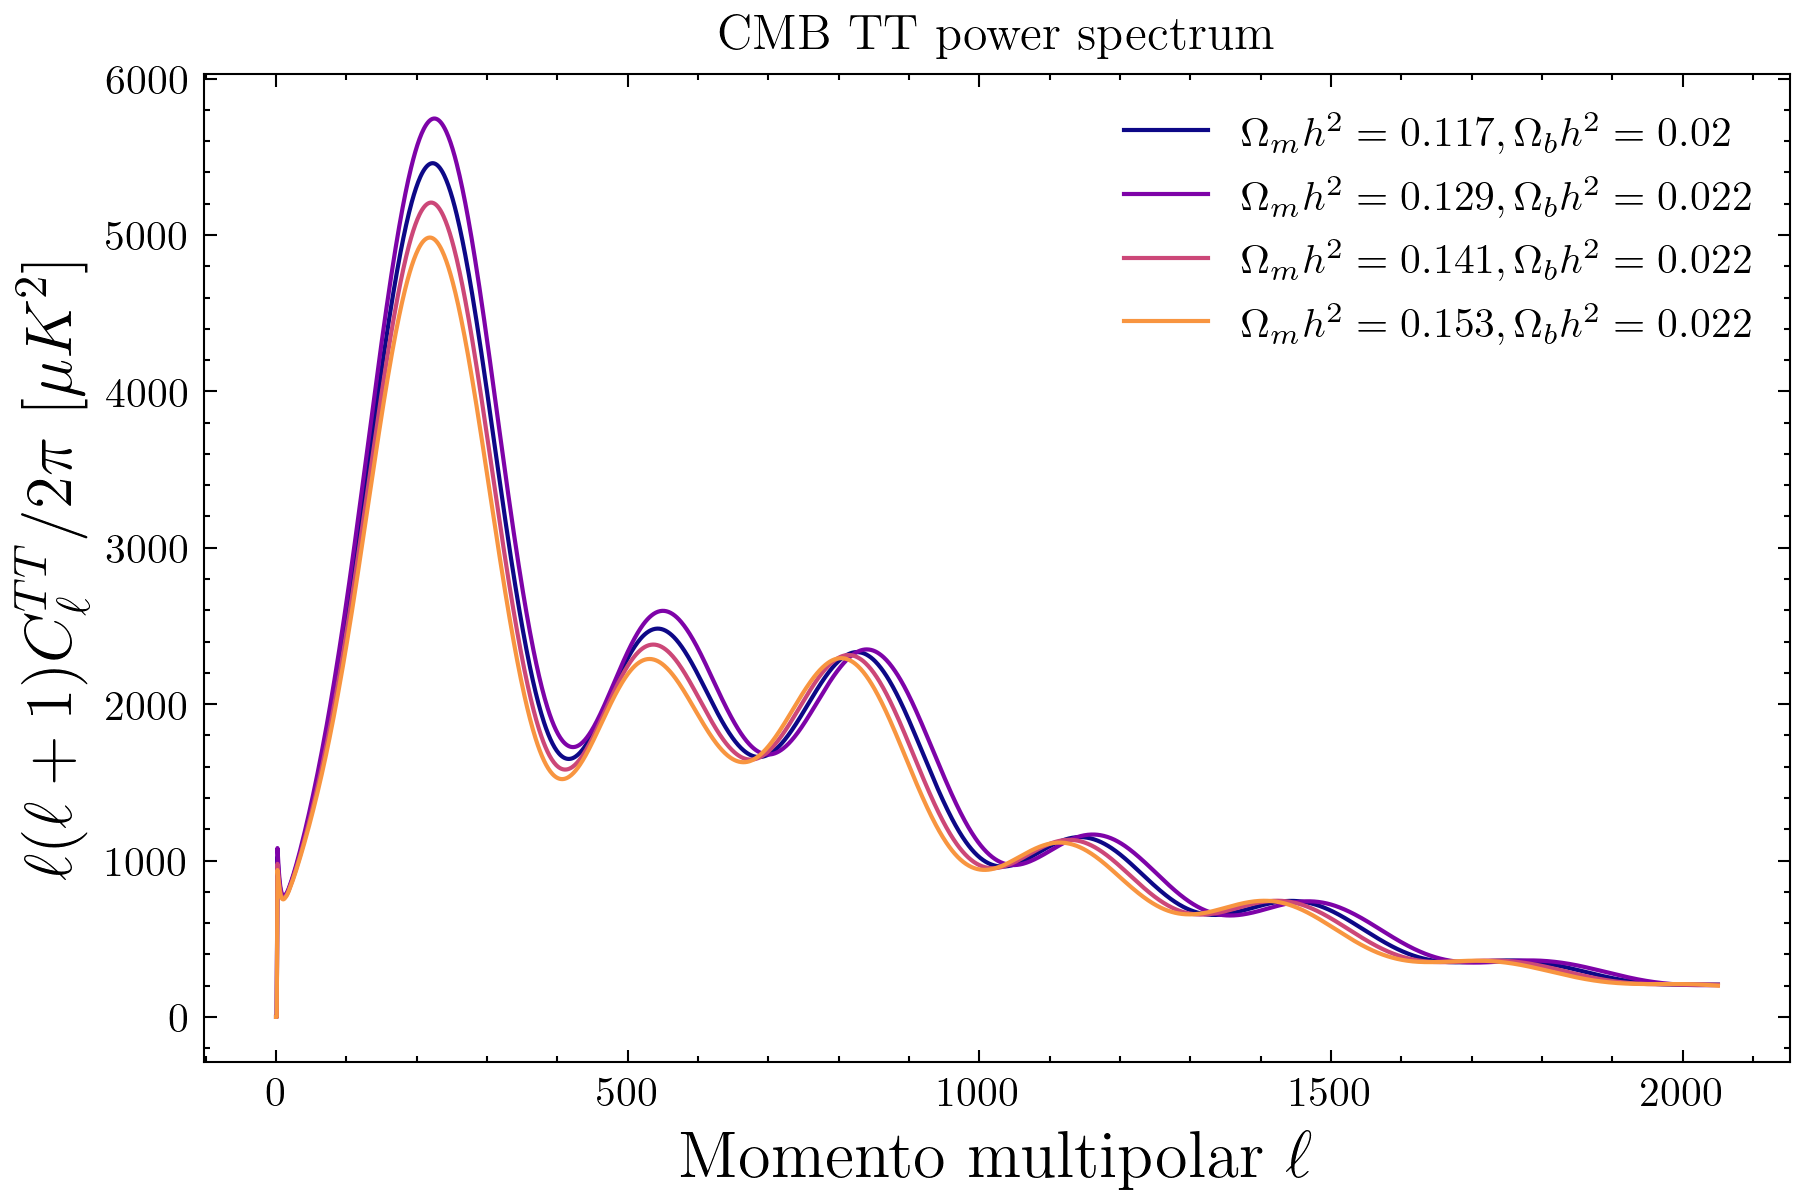

In [48]:
lensedCL = powers['lensed_scalar']
lensedCL1 = powers1['lensed_scalar']
lensedCL2 = powers2['lensed_scalar']
lensedCL3 = powers3['lensed_scalar']
ells = np.arange(lensedCL[:, 0].shape[0])

fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)
ax.plot(ells, lensedCL1[:, 0], color=colors[0], label = r'$\Omega_{m}h^2 = 0.117, \Omega_{b}h^2 = 0.02$')
ax.plot(ells, lensedCL[:, 0], color=colors[1], label = r'$\Omega_{m}h^2 = 0.129, \Omega_{b}h^2 = 0.022$')
ax.plot(ells, lensedCL2[:, 0], color=colors[2], label = r'$\Omega_{m}h^2 = 0.141, \Omega_{b}h^2 = 0.022$')
ax.plot(ells, lensedCL3[:, 0], color=colors[3], label = r'$\Omega_{m}h^2 = 0.153, \Omega_{b}h^2 = 0.022$')

ax.legend(loc='upper right')
ax.set_title(r'CMB TT power spectrum')
ax.set_xlabel(r'Momento multipolar $\ell$', fontsize=16)
ax.set_ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)

Since the gravitational potential is largely controlled by cold dark matter (CDM), changes in $ \Omega_c h^2 $ modify the "driving term" of the acoustic oscillations. This driving term influences the oscillation amplitude, similar to how changes in baryon density do, by altering the gravitational forces acting on the plasma during the early universe. 

Moreover, CDM plays a major role in establishing the epoch of equality, the time when the energy densities of radiation and matter were equal. An increase in $ \Omega_c h^2 $ shifts this epoch to an earlier time, which boosts the growth of perturbations. This additional growth strengthens the gravitational structures that influence the CMB pattern. 

Finally, since the ISW effect describes changes in the energies of CMB photons as they travel through time-evolving gravitational potentials, a higher CDM density means less decay in these gravitational potentials after recombination, reducing the ISW effect. This leads to smaller changes in the temperature anisotropies caused by the ISW effect when $ \Omega_c h^2 $ is high.

In [49]:
h= 0.67
Omega_bh2 = 0.022
Omega_mh2 = 0.129

Omega_k = 0.03
results = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
powers = results.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

Omega_k = 0.0
results1 = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
powers1 = results1.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

Omega_k = -0.03
results2 = camb.get_results(param(Omega_mh2, Omega_bh2, h, Omega_k))
powers2 = results2.get_cmb_power_spectra(param(Omega_mh2, Omega_bh2, h, Omega_k), CMB_unit= 'muK')

Text(0, 0.5, '$\\ell(\\ell+1)C_{\\ell}^{TT} / 2\\pi$ [$\\mu K^2$]')

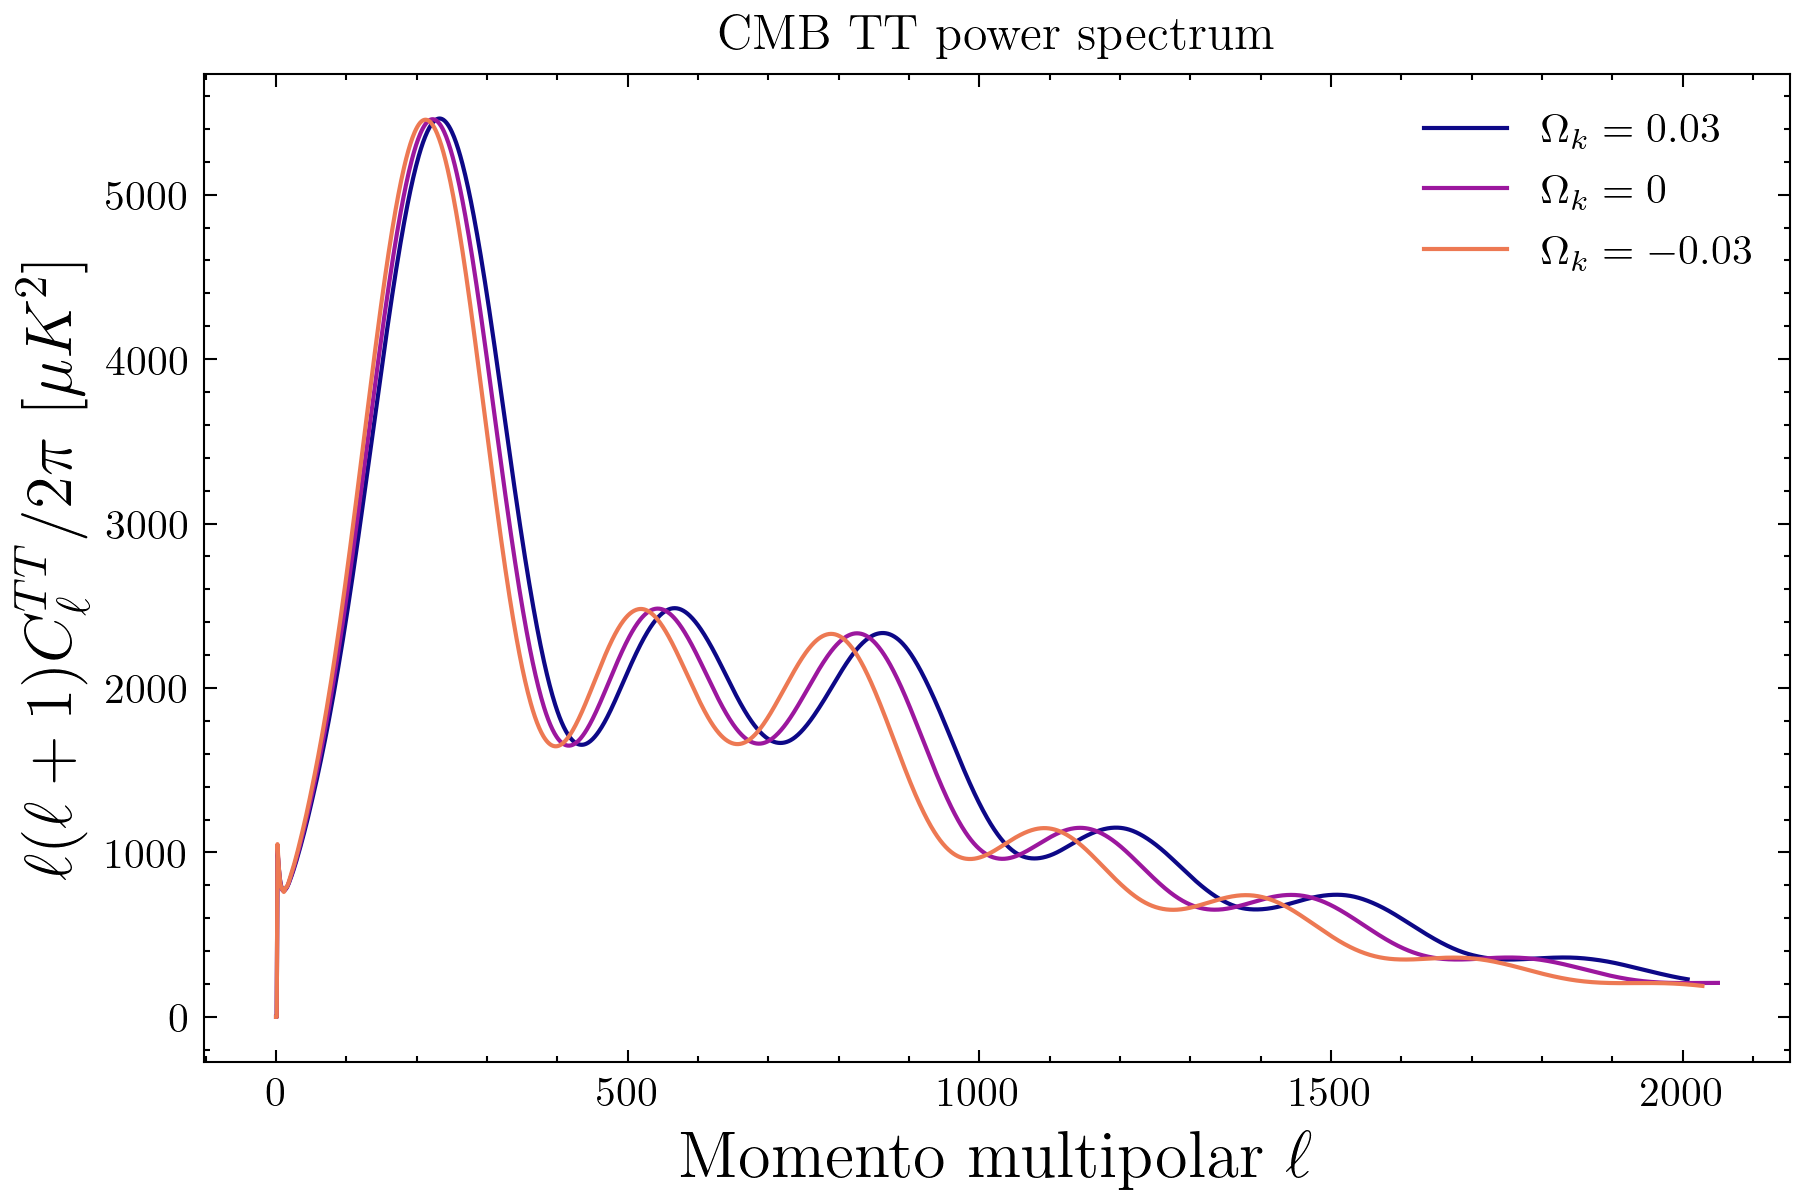

In [50]:
lensedCL = powers['lensed_scalar']
lensedCL1 = powers1['lensed_scalar']
lensedCL2 = powers2['lensed_scalar']
ells = np.arange(lensedCL[:, 0].shape[0])
ells1 = np.arange(lensedCL1[:, 0].shape[0])
ells2 = np.arange(lensedCL2[:, 0].shape[0])


fig, ax = plt.subplots(ncols=1, nrows=1, sharey=True, figsize=(6, 4), constrained_layout = True, dpi=300)
# Colors
cmap = get_cmap('plasma')
num_lines = 3
colors = [cmap(i / num_lines) for i in range(num_lines)]

ax.plot(ells, lensedCL[:, 0], color=colors[0], label = r'$\Omega_{k}= 0.03$')
ax.plot(ells1, lensedCL1[:, 0], color=colors[1], label = r'$\Omega_{k}= 0$')
ax.plot(ells2, lensedCL2[:, 0], color=colors[2], label = r'$\Omega_{k}= -0.03$')

ax.legend(loc='upper right')
ax.set_title(r'CMB TT power spectrum')
ax.set_xlabel(r'Momento multipolar $\ell$', fontsize=16)
ax.set_ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)

In a non-Euclidean universe (one with curvature), the path of photons changes, meaning that two photons that start on parallel paths will eventually converge or diverge. In a Euclidean (flat) universe, a fixed physical scale (such as the scale of the first peak in the CMB power spectrum) appears at a specific angular scale. However, in an open universe (with negative curvature), this same scale is projected onto a smaller angular scale, shifting the peaks to higher 𝑙 values (smaller angles).